# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import time
from collections import deque
import matplotlib.pyplot as plt
from maddpg import MADDPG

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

Score (max over agents) from episode 0: 0.0


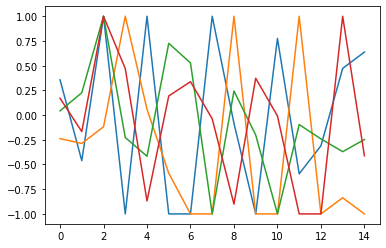

In [5]:
actions_agent0 = []
actions_agent1 = []

for i in range(1):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
     
        actions_agent0.append(actions[0])
        actions_agent1.append(actions[1])
        
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

    
plt.figure()
plt.plot(actions_agent0)
plt.plot(actions_agent1)    

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

Watch an untrained game

Episode: 0	Current Score: 0.00

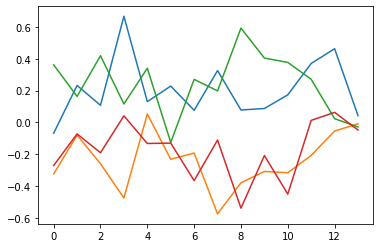

In [6]:
noise_ampl = 1
noise_reduction = 1
actions_agent0 = []
actions_agent1 = []

ddpg_agents = MADDPG()                                     # initilize the agents

for i in range(1):                                         # play game for a few episodes
    
    ddpg_agents.reset()         
    
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        
    while True:
        
        ddpg_agents.reset()
        
        actions = ddpg_agents.act(states,noise_ampl=noise_ampl) # select an action  
        noise_ampl *= noise_reduction

        actions_agent0.append(actions[0])
        actions_agent1.append(actions[1])
            
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        ddpg_agents.add_memory(states, actions, rewards, next_states, dones)
        ddpg_agents.step()
        scores += env_info.rewards                         # update the score (for each agent)
        
        states = next_states                               # roll over states to next time step
        
        if np.any(dones):                                  # exit loop if episode finished
            break
            
    print('\rEpisode: {}\tCurrent Score: {:.2f}'.format(i, np.max(scores)), end="")  


plt.plot(actions_agent0)
plt.plot(actions_agent1)

Perform training

Episode: 100	Current Score: 0.00 	Average Score: 0.00
Episode: 200	Current Score: 0.00 	Average Score: 0.00
Episode: 300	Current Score: 0.00 	Average Score: 0.00
Episode: 400	Current Score: 0.10 	Average Score: 0.05
Episode: 500	Current Score: 0.00 	Average Score: 0.05
Episode: 600	Current Score: 0.10 	Average Score: 0.03
Episode: 700	Current Score: 0.20 	Average Score: 0.06
Episode: 800	Current Score: 0.10 	Average Score: 0.09
Episode: 900	Current Score: 0.10 	Average Score: 0.14
Episode: 1000	Current Score: 0.10 	Average Score: 0.23
Episode: 1100	Current Score: 0.10 	Average Score: 0.29
Episode: 1200	Current Score: 0.50 	Average Score: 0.30
Episode: 1300	Current Score: 0.70 	Average Score: 0.39
Episode: 1400	Current Score: 0.10 	Average Score: 0.29
Episode: 1500	Current Score: 0.20 	Average Score: 0.19
Episode: 1600	Current Score: 0.10 	Average Score: 0.24
Episode: 1700	Current Score: 0.10 	Average Score: 0.15
Episode: 1800	Current Score: 0.19 	Average Score: 0.30
Episode: 1900	Curre

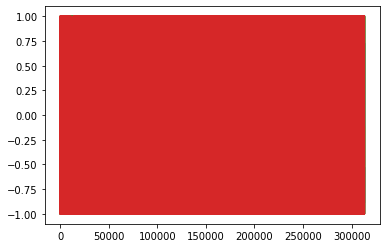

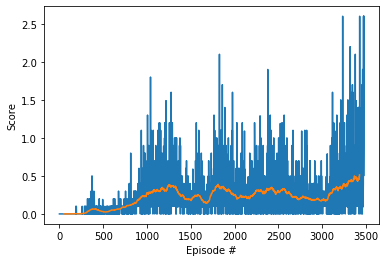

In [7]:
def train_maddpg(n_episodes = 5000, noise_ampl = 1, noise_reduction = 1):
    """Multi-Agent Deep Deterministic Policy Gradient.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        noise (float): noise amplitude
        noise_reduction (float): multiplicative factor (per step) for decreasing the noise amplitude
    """
    
    ddpg_agents = MADDPG()                                       # initialize policy and critic    
    
    scores_ave = []                    # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
   
    actions_agent0 = []
    actions_agent1 = []

    for i_episode in range(1, n_episodes+1):
    
        ddpg_agents.reset()                                    # reset the agents (noise mean)  
      
    
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)

        while True:
            
            actions = ddpg_agents.act(states,noise_ampl=noise_ampl) # select an action  
            noise_ampl *= noise_reduction
        
            actions_agent0.append(actions[0])
            actions_agent1.append(actions[1])
        
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)

            # Update buffer
            ddpg_agents.add_memory(states, actions, rewards, next_states, dones)
            ddpg_agents.step()
            
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break

        # Update NNs
        #if i_episode % 2:
        #    ddpg_agents.step()


        scores_window.append(np.max(scores))                  # save most recent max score between all agents
        scores_ave.append(np.max(scores))                     # last 100 max scores
     
        print('\rEpisode: {}\tCurrent Score: {:.2f} \tAverage Score: {:.2f}'.format(i_episode, np.max(scores), np.mean(scores_window)), end="")  
        
        if i_episode % 100 == 0:
            print('\rEpisode: {}\tCurrent Score: {:.2f} \tAverage Score: {:.2f}'.format(i_episode, np.max(scores), np.mean(scores_window)))  
        
        if np.mean(scores_window) >= 0.5 or i_episode == n_episodes-1:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(ddpg_agents.maddpg_agent[0].actor_local.state_dict(), 'checkpoint_actor0.pth')
            torch.save(ddpg_agents.maddpg_agent[0].critic_local.state_dict(), 'checkpoint_critic0.pth')
            torch.save(ddpg_agents.maddpg_agent[1].actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(ddpg_agents.maddpg_agent[1].critic_local.state_dict(), 'checkpoint_critic1.pth')
            break    
     
    plt.figure()
    plt.plot(actions_agent0)
    plt.plot(actions_agent1)

    return scores_ave

start_time = time.time()
scores_final = train_maddpg()
end_time = time.time()
print('Elapsed time: {} seconds'.format(end_time - start_time))  



# Compute a rolling average of the scores
N = 100
cumsum, moving_aves = [0], []

for i, x in enumerate(scores_final, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        moving_aves.append(moving_ave)
     
    

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_final)), scores_final)
plt.plot(np.arange(len(moving_aves))+N/2, moving_aves)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()    
        

Watch the trained agents play

In [10]:
# load the NNs weights from file
ddpg_agents.maddpg_agent[0].actor_local.load_state_dict(torch.load('checkpoint_actor0.pth'))
ddpg_agents.maddpg_agent[0].critic_local.load_state_dict(torch.load('checkpoint_critic0.pth'))

ddpg_agents.maddpg_agent[1].actor_local.load_state_dict(torch.load('checkpoint_actor1.pth'))
ddpg_agents.maddpg_agent[1].critic_local.load_state_dict(torch.load('checkpoint_critic1.pth'))

for tries in range(3):
    
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    ddpg_agents.reset()                                    # reset the agents   
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)

    while True:
        actions = ddpg_agents.act(states,noise_ampl=1)     # select an action  
        
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment

        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)

        ddpg_agents.step()

        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break

    print('Score (max over agents) from episode {}: {}'.format(tries, np.max(scores)))
            

Score (max over agents) from episode 0: 0.30000000447034836
Score (max over agents) from episode 1: 0.6000000089406967
Score (max over agents) from episode 2: 0.30000000447034836


When finished close the environment and the logger

In [9]:
#env.close()
#logger.close()